# KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings']
data = pd.read_csv('abalone.data',names = column_names)
print("Total Number of samples: %d" % len(data))
data.head(5) # See samples of raw data

Total Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
# scikit-learn takes only numbers as parameters, so firstly create a binary feature for eahc of the 3 values
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]

# convert age to age group
for ix in data.index:
    row = data.loc[ix]
    if row.rings <= 8:
        data.loc[ix, 'rings'] = 'young'
    elif row.rings >= 11:
        data.loc[ix, 'rings'] = 'old'
    elif row.rings >=9 & row.rings <= 10:
        data.loc[ix, 'rings'] = 'medium'
        
data = data[['length','diameter','height','whole weight','shucked weight',
             'viscera weight','shell weight','M','F','I','rings']]
data.head(5)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,M,F,I,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False,old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False,young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False,medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False,medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True,young


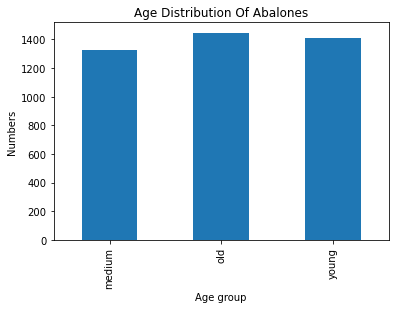

In [5]:
age_group = data.groupby('rings').rings.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution Of Abalones')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# first split data to available and in box
#x_available,x_inbox,y_available,y_inbox = train_test_split(x,y,test_size=0.2,random_state=1)
# second spilt data to train and test from avalable dataset
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [8]:
from sklearn.neighbors import KNeighborsClassifier
parameters_knn = {'n_neighbors':range(1,50)}
clf_knn = GridSearchCV(KNeighborsClassifier(),parameters_knn, cv=10)

clf_knn.fit(X=x_train,y=y_train)
knn_model = clf_knn.best_estimator_
print(clf_knn.best_params_)
print("K-Fold:{:.2f}%".format((clf_knn.best_score_)*100))

{'n_neighbors': 14}
K-Fold:64.74%


In [9]:
from sklearn.metrics import accuracy_score
y_pred=clf_knn.predict(x_test)
#print("Accuracy:{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
accuracy_score(y_test, y_pred)*100

62.67942583732058

In [10]:
from sklearn.metrics import recall_score

recallVal=recall_score(y_test,y_pred,average=None)
recallVal.mean()*100

62.80045347803939

In [11]:
from sklearn.metrics import precision_score
#print("Precision:{:.2f}%".format(precision_score(y_test,y_pred,average="micro")*100))

precision_score(y_test,y_pred,average=None).mean()

0.6399728610633796

In [12]:
from sklearn.metrics import recall_score
#print("Sensitivity:{:.2f}%".format(recall_score(y_test,y_pred,average='micro')*100))
recall_score(y_test,y_pred,average=None).mean()*100

62.80045347803939

# ID3

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings']
data = pd.read_csv('abalone.data',names = column_names)
print("Total Number of samples: %d" % len(data))
data.head(5) # See samples of raw data
# scikit-learn takes only numbers as parameters, so firstly create a binary feature for eahc of the 3 values
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]

# convert age to age group
for ix in data.index:
    row = data.loc[ix]
    if row.rings <= 8:
        data.loc[ix, 'rings'] = 'young'
    elif row.rings >= 11:
        data.loc[ix, 'rings'] = 'old'
    elif row.rings >=9 & row.rings <= 10:
        data.loc[ix, 'rings'] = 'medium'
        
data = data[['length','diameter','height','whole weight','shucked weight',
             'viscera weight','shell weight','M','F','I','rings']]
data.head(5)
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# first split data to available and in box
#x_available,x_inbox,y_available,y_inbox = train_test_split(x,y,test_size=0.2,random_state=1)
# second spilt data to train and test from avalable dataset
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size=0.2, random_state=1)

Total Number of samples: 4177


In [14]:
feature_names = ["length","diameter","height","whole weight","shucked weight","viscera weight","shall weight","M","F","I"]

In [15]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz
import matplotlib.pyplot as plt

estimator = Id3Estimator()
estimator.fit(x_train, y_train)
export_graphviz(estimator.tree_, 'tree.dot',feature_names)
predictions = estimator.predict(x_test) 
#print(x_test)
#print("Predicted class label for new Data point : " ,predictions[0]);

from graphviz import render

render('dot', 'png', 'E:/Softwares/OneDrive/Desktop/Machine Learning/Project/Dataset/Abalone/tree.dot')

'E:/Softwares/OneDrive/Desktop/Machine Learning/Project/Dataset/Abalone\\tree.dot.png'

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [17]:
from sklearn import tree
dotfile = open("E:/Softwares/OneDrive/Desktop/Machine Learning/Project/Dataset/Abalone/treeID3.dot", 'w')
tree.export_graphviz(clf_tree, out_file = dotfile)
dotfile.close()


from graphviz import render

render('dot', 'png', 'E:/Softwares/OneDrive/Desktop/Machine Learning/Project/Dataset/Abalone/treeID3.dot')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.774707 to fit


'E:/Softwares/OneDrive/Desktop/Machine Learning/Project/Dataset/Abalone\\treeID3.dot.png'

In [43]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=clf_tree,X=x_train,y=y_train,cv=10)
print("Accuracy With K-Fold:{:.2f}%".format((accuracy.mean()*100)))

Accuracy With K-Fold:59.05%


In [39]:
from sklearn.metrics import accuracy_score
y_pred=clf_tree.predict(x_test)
#print("Accuracy:{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 55.980861244019145


In [37]:
from sklearn.metrics import precision_score
#print("Precision:{:.2f}%".format(precision_score(y_test,y_pred,average="micro")*100))

print("Precision: ",precision_score(y_test,y_pred,average=None).mean()*100)

Precision:  55.596634483247776


In [36]:
from sklearn.metrics import recall_score
#print("Recall:{:.2f}%".format(recall_score(y_test,y_pred,average='micro')*100))
print("Recall: ",recall_score(y_test,y_pred,average=None).mean()*100)

Recall:  55.98104085695327


In [35]:
from sklearn.metrics import recall_score
#print("Sensitivity:{:.2f}%".format(recall_score(y_test,y_pred,average='micro')*100))
print("Sensitivity: ",recall_score(y_test,y_pred,average=None).mean()*100)

Sensitivity:  55.98104085695327


# Feature Selection With Backward Elimination

In [ ]:
import pandas as pd # for importing dataset
import numpy as np 
import matplotlib as plt
#Importing the dataset
df=pd.read_csv('abalone.csv')
#First 5 instances of the dataset
#this is initializing x with 8 given attributes and its instances
x=df.iloc[:,:-1]
#this is initializing y with classlabel and its instances
y=df.iloc[:,8]
#transforming column sex that is a categorical data into numerical data

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('sex', OneHotEncoder(), [0])], remainder='passthrough')
x = columnTransformer.fit_transform(x)
pd.DataFrame(x)
#Avoiding the dummy variable trap:
x=x[:,1:]
#printing entire day
pd.DataFrame(x)


In [ ]:
#Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
#70% training (x) and 30% is test (y)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)


y_pred=mlr.predict(x_test)
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test,y_pred)*100)

#by using Linear Regression R2 Score we get 52.48%
# using Linear Regression we are applying all independent variables
# (All independent values) x = D1,D2,length,diameter,height,whole weight,shucked weight,viscera weight,shall weight
#Now from all independent values we will find the best independent feature

#Backward Elimination:

In [ ]:
import statsmodels.api as sm
# Doing this because the bias value is not being assign automatically in BE as in LR y=mx+b the b(intercept) is assigned
# automatically.
X=np.append(arr=np.ones((4177,1)).astype(int), values=x,axis=1)
pd.DataFrame(X)

In [ ]:
#taking all rows and all column
X_opt=X[:,:]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt=X[:,[0,1,2,4,5,6,7,8,9]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
#removed the D2 column which was x2 because it P value was higher than 0.05
X_opt=X[:,[0,1,4,5,6,7,8,9]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
#the remaining columns 
#x0,x1,x2,x4,x5,x6,x7
#Intercept,D1,diameter,height,whole weight,shucked weight,viscera weight,shall weight

In [ ]:
#Importing the dataset
df1=pd.read_csv('abalone.csv')
df1.shape
df2=df1.drop(["length"],axis='columns')
df2.head()
target_feature='rings'

In [ ]:
#Separate object for target feature
y=df2[target_feature]

#Seperate object from input features
X=df2.drop(target_feature,axis=1)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('sex', OneHotEncoder(), [0])], remainder='passthrough')
X = columnTransformer.fit_transform(X)
pd.DataFrame(X)
#Avoiding the dummy variable trap:
X=X[:,1:]
#printing entire day
pd.DataFrame(X)

In [ ]:
X=X[:,[0,2,3,4,5,6,7]]
pd.DataFrame(X)

In [ ]:
from sklearn.model_selection import train_test_split
#70% training (x) and 30% is test (y)
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score
r2Score=cross_val_score(estimator=regr,X=x_train,y=y_train,cv=10)
print("R2 Score Avg:{:.2f}%".format((r2Score.mean()*100)))

# Other Way

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings']
data = pd.read_csv('abalone.data',names = column_names)
print("Total Number of samples: %d" % len(data))


# scikit-learn takes only numbers as parameters, so firstly create a binary feature for eahc of the 3 values

#for label in "MFI":
  #  data[label] = data["sex"] == label
   # print(label)
#del data["sex"]

# convert age to age group
for ix in data.index:
    row = data.loc[ix]
    if row.rings <= 8:
        data.loc[ix, 'rings'] = 0 #'young'
    elif row.rings >= 11:
        data.loc[ix, 'rings'] = 1  #'old'
    elif row.rings >=9 & row.rings <= 10:
        data.loc[ix, 'rings'] = 2  #'medium'
        
data = data[['length','diameter','height','whole weight','shucked weight',
             'viscera weight','shell weight','sex','rings']]
data.head(5)
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.iloc[:,7]=le.fit_transform(x.iloc[:,7])

y = data.iloc[:,-1]
# first split data to available and in box
x_available,x_inbox,y_available,y_inbox = train_test_split(x,y,test_size=0.2,random_state=1)
# second spilt data to train and test from avalable dataset
x_train, x_test, y_train, y_test = train_test_split( x_available, y_available, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)


y_pred=mlr.predict(x_test)
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test,y_pred)*100)

In [ ]:
x

In [ ]:
import statsmodels.api as sm
# Doing this because the bias value is not being assign automatically in BE as in LR y=mx+b the b(intercept) is assigned
# automatically.
X=np.append(arr=np.ones((4177,1)).astype(int), values=x,axis=1)
pd.DataFrame(X)



In [ ]:
X_opt=X[:,:]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt=X[:,[0,1,2,3,4,5,6,8]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt=X[:,[0,1,2,3,4,5,6]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt=X[:,[0,1,2,3,4,6]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings']
data = pd.read_csv('abalone.data',names = column_names)
print("Total Number of samples: %d" % len(data))

df2=data.drop(["shucked weight","shell weight"],axis='columns')
df2.head()
# scikit-learn takes only numbers as parameters, so firstly create a binary feature for eahc of the 3 values

#for label in "MFI":
  #  data[label] = data["sex"] == label
   # print(label)
#del data["sex"]

# convert age to age group
for ix in data.index:
    row = data.loc[ix]
    if row.rings <= 8:
        data.loc[ix, 'rings'] = 0 #'young'
    elif row.rings >= 11:
        data.loc[ix, 'rings'] = 1  #'old'
    elif row.rings >=9 & row.rings <= 10:
        data.loc[ix, 'rings'] = 2  #'medium'
        
data = data[['length','diameter','height','whole weight',
             'viscera weight','rings']]
data.head(5)
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]

y = data.iloc[:,-1]
# first split data to available and in box
x_available,x_inbox,y_available,y_inbox = train_test_split(x,y,test_size=0.2,random_state=1)
# second spilt data to train and test from avalable dataset
x_train, x_test, y_train, y_test = train_test_split( x_available, y_available, test_size=0.2, random_state=1)
x_train

In [ ]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score
r2Score=cross_val_score(estimator=regr,X=x_train,y=y_train,cv=10)
print("R2 Score Avg:{:.2f}%".format((r2Score.mean()*100)))